# Data release usage for spin and kick populations of arxiv:2107.09693

In [1]:
import numpy as np
import matplotlib.pyplot as P
%matplotlib inline

In [2]:
def ppd_plotter(ax, x, prob, label, color='royalblue', zorder=1):
    """
    Plots the PPD mean and 90% credible bounds for a given set of PDF draws.
    """
    ppd = np.mean(prob, axis=0)
    ppd_5 = np.percentile(prob, 5, axis=0)
    ppd_95 = np.percentile(prob, 95, axis=0) 
    ax.plot(x, ppd, color=color, lw=3, ls='solid', zorder=zorder)
    ax.fill_between(x, ppd_5, ppd_95, color=color, alpha=0.6, zorder=-1)
    ax.set_xlabel('${0}$'.format(label), fontsize=18)
    ax.set_ylabel('$p({0})$'.format(label), fontsize=18)
    ax.tick_params(labelsize=12)

def plot_results(phi_sigma_prior):
    """
    Loads pre-generated PDF draws for spin and kick populations.
    NOTE: You can also generate these for yourself using the script generate_pop_draws.py
    
    In this function:
    xvals_dict:    Dictionary of xvals on which the PDFs are evaluated.
    chimag_pdfs:   Draws of posterior spin magnitude PDFs.
    costheta_pdfs: Draws of posterior spin tilt angle PDFs.
    phi1_pdfs:     Draws of posterior spin phi1 angle PDFs.
    delphi_pdfs:   Draws of posterior spin delta_phi angle PDFs.
    vfmag_pdfs:    Draws of posterior kick magnitude PDFs.
    
    For example, to plot one draw of the spin magnitude PDF, you can do:
    P.plot(xvals_dict['chimag'], chimag_pdfs[0])
    
    This function plots the 90% credible bounds on draws like these, 
    similar to Fig.2, Fig.S1 and Fig.S2 of arxiv:2107.09693 
    """ 
    if phi_sigma_prior not in ['Jeffreys', 'Flat']:
        raise Exception('Invalid phi_sigma_prior')

    # Load posterior probablity draws for spin and kick populations
    resdir = phi_sigma_prior
    xvals_dict = np.load('{0}/xvals_dict.npy'.format(resdir), allow_pickle=1).item()
    chimag_pdfs = np.load('{0}/chimag_pdfs.npy'.format(resdir))
    costheta_pdfs = np.load('{0}/costheta_pdfs.npy'.format(resdir))
    phi1_pdfs = np.load('{0}/phi1_pdfs.npy'.format(resdir))
    delphi_pdfs = np.load('{0}/delphi_pdfs.npy'.format(resdir))
    vfmag_pdfs = np.load('{0}/vfmag_pdfs.npy'.format(resdir))    
    
    fig, axarr = P.subplots(5, 1, figsize=(8, 25))
    P.subplots_adjust(hspace=0.35, wspace=0.5)
    P.suptitle('%s-$\sigma_{\phi}$'%(phi_sigma_prior), fontsize=18, y=0.9)

    ax = axarr[0]
    ppd_plotter(ax, xvals_dict["chimag"], chimag_pdfs, "\chi")
    ax.set_xlim(0, 1)

    ax = axarr[1]
    ppd_plotter(ax, xvals_dict["costheta"], costheta_pdfs, "\cos{\\theta}")
    ax.set_xlim(-1, 1)

    ax = axarr[2]
    ppd_plotter(ax, xvals_dict["phi"], phi1_pdfs, "\phi_1")
    ax.set_xlim(-np.pi, np.pi)
    ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
    ax.set_xticklabels(['$-\pi$', '$-\pi/2$', '$0$', '$\pi/2$', '$\pi$'])

    ax = axarr[3]
    ppd_plotter(ax, xvals_dict["phi"], delphi_pdfs, "\Delta \phi")
    ax.set_xlim(-np.pi, np.pi)
    ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
    ax.set_xticklabels(['$-\pi$', '$-\pi/2$', '$0$', '$\pi/2$', '$\pi$'])
    
    ax = axarr[4]
    ppd_plotter(ax, xvals_dict["vfmag"], vfmag_pdfs, "v_f")
    ax.set_xlim(0, 3000)

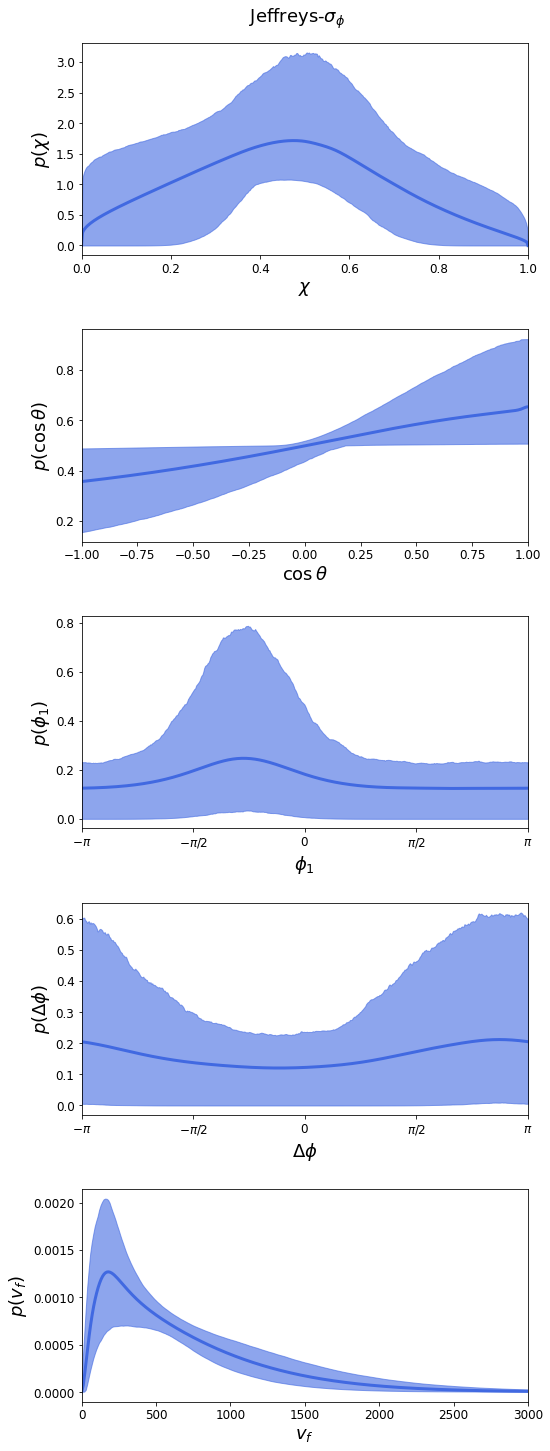

In [3]:
# Plot 90% PPD bounds for results using Jeffrey-sigma prior
# NOTE: This loads pre-generated PDF draws for spin and kick populations.
# You can also generate these for yourself using the script generate_pop_draws.py
plot_results('Jeffreys')

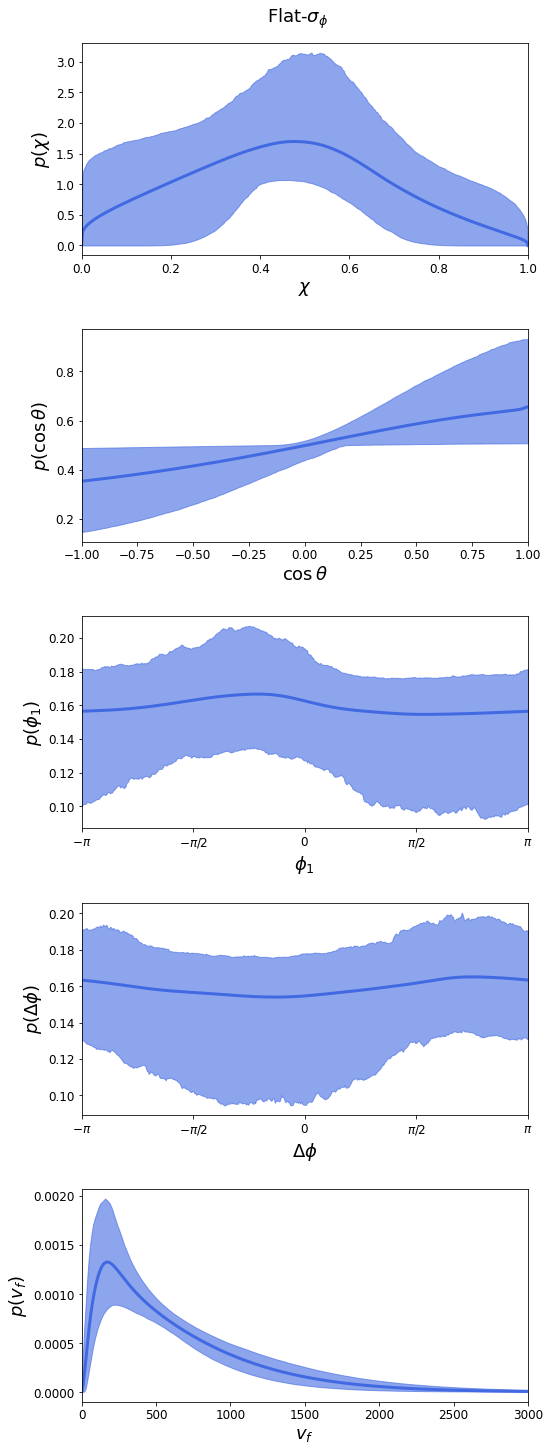

In [4]:
# Same as above, but using the Flat-sigma prior
plot_results('Flat')